# Отток клиентов

Сегодня поговорим про задачу оттока клиентов. На её примере мы обучим две модели и сравним их между собой с помощью изученных нами метрик классификации. 

In [9]:
# Как обычно, для начала подгружаем нужные нам пакеты
import pandas as pd    # пакет для работы с таблицами 
import numpy as np     # пакет для работы с матрицами 

# пакеты для картиночек 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # правильный (наиболее красивый) стиль у графиков

%matplotlib inline
# остальные пакеты подгрузим по мере необходимости

Итак, в наших руках оказался набор данных по оттоку клиентов телеком-оператора. Считаем данные и посмотрим что в них есть. 

In [10]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Описание переменных:** 

* `State` —	Буквенный код штата
* `Account length` — Как долго клиент обслуживается компанией
* `Area code` — Префикс номера телефона
* `International plan` — Международный роуминг (подключен/не подключен)
* `Voice mail plan` — Голосовая почта (подключена/не подключена)
* `Number vmail messages` — Количество голосовых сообщений
* `Total day minutes` — Общая длительность разговоров днем
* `Total day calls` — Общее количество звонков днем
* `Total day charge` — Общая сумма оплаты за услуги днем
* `Total eve minutes` — Общая длительность разговоров вечеромй
* `Total eve calls` — Общее количество звонков вечером
* `Total eve charge` — Общая сумма оплаты за услуги вечером
* `Total night minutes` — Общая длительность разговоров ночью
* `Total night calls` — Общее количество звонков ночью
* `Total night charge` — Общая сумма оплаты за услуги ночью
* `Total intl minutes` — Общая длительность международных разговоров
* `Total intl calls` — Общее количество международных разговоров
* `Total intl charge` — Общая сумма оплаты за международные разговоры
* `Customer service calls` — Число обращений в сервисный центр

**Целевая переменная:** `Churn` — Признак оттока, бинарный признак ($1$ – потеря клиента, то есть отток).

Будем обучать без штатов. Проведём небольшую предобработку данных. 

In [11]:
df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)

Выделим $70\%$ выборки `(X_train, y_train)` под обучение и $30\%$ будут отложенной выборкой `(X_test, y_test)`. отложенная выборка никак не будет участвовать в настройке параметров моделей, на ней мы в конце, после этой настройки, оценим качество полученной модели. Обучим на наших данных логистическую регрессию.

In [39]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# дробим выборку
X_train, X_test, y_train, y_test = train_test_split(df.values, y, test_size=0.3, random_state=17)

# объявляем модель
logreg = LogisticRegression( )

# обучаем обе модели
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

С помощью различных метрик посмотрим на качество прогнозов. Во-первых, обратим внимание на то, что в выборке среди классов наблюдается довольно большой дисбаланс. Это означает, что если мы скажем, что все ребята люди останутся нашими клиентами, мы получи высокое `accuracy` модели. 

In [40]:
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [41]:
from sklearn.metrics import accuracy_score
y_knn = knn.predict(X_test)
y_logreg = logreg.predict(X_test)

print('Говорим, что все останутся: ', accuracy_score(y_test, [0]*len(y_test)))
print('Логистическая регрессия: ', accuracy_score(y_test, y_logreg))

Говорим, что все останутся:  0.867
Логистическая регрессия:  0.871


Разные метрики качества мы с вами разобрали на доске. Если вы не поняли их, можно [глянуть лекцию Жени Соколова.](https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie/lecture/IVuAc/mietriki-kachiestva-klassifikatsii-1)  Расскажите потом понятной она вам показалась или непонятной, если будете смотреть.

Вкратце напомню о чём шла речь. Предсказывая отток, мы можем совершить ошибки двух видов: 

* Ошибка первого рода: мы предсказали человеку, что он уйдёт, а он остался.
* Ошибка второго рода: мы предсказали, что человек останется, а он ушёл.

В разных задачах критичны разные виды ошибок. На основе этих ошибок можно придумать много метрик. Мы с вами построили вот такую табличку  

![](http://blog.exsilio.com/wp-content/uploads/2016/09/table-blog.png)

и обсудили слудущие метрики качества: 

* Доля верно классифицированных объектов:

$$Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$$

Интуитивно понятная, очевидная и почти неиспользуемая метрика. Её главная проблема в том, что она бесполезна в задачах с неравными классами. Например, пусть у нас есть $50$ больных и $950$ здоровых. Мы хотим научиться их различать. Пусть наш алгоритм предсказывает, что все здоровы. В этом случае доля правильных ответов составит $95\%$, но алгорим окажется абсолютно бесполезным. 

Чтобы избежать таких эксцессов, а также учитывать, что разные типы ошибок могут иметь разную цену, строят другие две метрики: точность и полноту. 

* Точность (precision): 

$$P = \frac{TP}{TP + FP}$$

Отражает то, насколько мы можем доверять алгоритму, если он спрогнозировал единичку. 

* Полнота (Recall): 

$$R = \frac{TP}{TP + FN}$$

Показывает, как много объектов первого класса наш алгоритм находит.

Введение `Precision` не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня `False Positive`. `Recall` демонстрирует способность алгоритма обнаруживать данный класс вообще, а `Precision` — способность отличать этот класс от других классов.

Более высокая точность влечёт более низкую полноту. Баланс между этими характеристиками выбирается в зависимости от задачи. В случае поиска больных, на бы хотелось получить максимальную полноту. Нестрашно, если здоровый сдаст анализы, страшно если мы пропустим больного. В задаче выдаче кредитов, наоборот, важнее точность.

Можно склеить эти две метрики, посчитав их среднее гармонческое и получить f-меру: 

* F-measure: 

$$F = \frac{1}{\beta\frac{1}{P} + (1 - \beta)\frac{1}{R}}$$

Параметр $\beta$ в данном случае определяет вес точности в метрике. $\beta = 1$ вносит точность и полноту с одинаковыми весами. Изменяя его, можно отдавать предпочтения либо одному либо другому. 

Все эти метрики уже есть в пакете sklearn. По уму надо бы реализовать их самостоятельно, чтобы лучше понять, но у нас на это нет особо времени, поэтому это домашнее задание :) 

Итак, посмотрим на наши чудо-метрики!

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
import itertools

# Функция для отрисовки конфьюжн матрикс 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=16)
    plt.yticks(tick_marks, classes, fontsize=16)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=30)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16)
    plt.xlabel('Predicted label', fontsize=16)
    pass

Поставим в качестве порога 0.5 и посмотрим какими получатся точность и полнота для логистической регрессии.

In [43]:
# функция ниже предсказывает вероятности, в первом столбце вероятность,
# что клиент останется, во втором, что уйдёт 

logreg.predict_proba(X_test)

array([[0.96510755, 0.03489245],
       [0.46916741, 0.53083259],
       [0.91240469, 0.08759531],
       ...,
       [0.45450148, 0.54549852],
       [0.97250517, 0.02749483],
       [0.94893069, 0.05106931]])

             precision    recall  f1-score   support

          0       0.89      0.97      0.93       867
          1       0.53      0.24      0.33       133

avg / total       0.84      0.87      0.85      1000



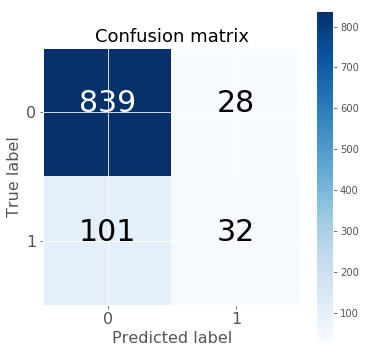

In [44]:
cutoff = 0.5  # выбрали погог

# говорим, что все клиенты с вероятностью оттока больше 0.5 уйдут
y_hat = logreg.predict_proba(X_test)[:, -1] > cutoff

# строим матрицу ошибок
cm = confusion_matrix(y_test, y_hat)

# рисуем матрицу ошибок
plot_confusion_matrix(cm, classes=['0', '1'])

# выводим на экран отчёт, в которым посчитаются метрики по всем классам
report = classification_report(y_test, y_hat)
print(report)

Попробуем увеличить порог до $0.8$ 

             precision    recall  f1-score   support

          0       0.87      1.00      0.93       867
          1       0.75      0.02      0.04       133

avg / total       0.85      0.87      0.81      1000



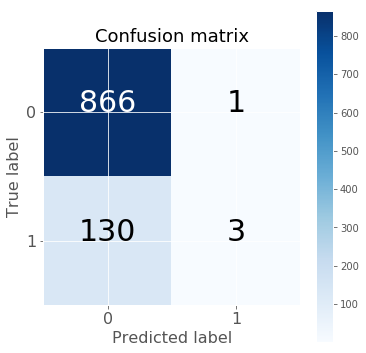

In [32]:
cutoff = 0.8  # выбрали погог

# говорим, что все клиенты с вероятностью оттока больше 0.5 уйдут
y_hat = logreg.predict_proba(X_test)[:, -1] > cutoff

# строим матрицу ошибок
cm = confusion_matrix(y_test, y_hat)

# рисуем матрицу ошибок
plot_confusion_matrix(cm, classes=['0', '1'])

# выводим на экран отчёт, в которым посчитаются метрики по всем классам
report = classification_report(y_test, y_hat)
print(report)

Как вы поняли, все метрики, рассмотренные выше зависят от величины порога. Хотелось бы строить метрику, которая независит от порога, а потом для лучшей моделей подбирать порог в зависимости от наших бизнес-целей. 

Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является $ROC-AUC$ — площадь (Area Under Curve) под кривой ошибок. Данная кривая представляет из себя линию от $(0,0)$ до $(1,1)$ в координатах $True Positive Rate (TPR)$ и $False Positive Rate (FPR)$:

True Positive Rate: $$TPR = \frac{TP}{TP + FN}$$

False Positive Rate: $$FPR = \frac{FP}{FP + TN}$$

$TPR$ нам уже известна, это полнота, а $FPR$ показывает, какую долю из объектов negative класса алгоритм предсказал неверно. В идеальном случае, когда классификатор не делает ошибок $(FPR = 0, TPR = 1)$ мы получим площадь под кривой, равную единице; в противном случае, когда классификатор случайно выдает вероятности классов, $ROC-AUC$ будет стремиться к $0.5$, так как классификатор будет выдавать одинаковое количество $TP$ и $FP$.

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Функция для отрисовки roc-auc кривой    
def roc_auc_pic(model, y_train, y_test, X_train, X_test):
    y_hat_train = model.predict_proba(X_train)[:,1]
    y_hat_test = model.predict_proba(X_test)[:,1]
    
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_hat_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_test)
    roc_auc_train = roc_auc_score(y_train, y_hat_train)
    roc_auc_test = roc_auc_score(y_test, y_hat_test)

    matplotlib.rcParams['figure.figsize'] = (8, 8)
    plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show() 
    pass

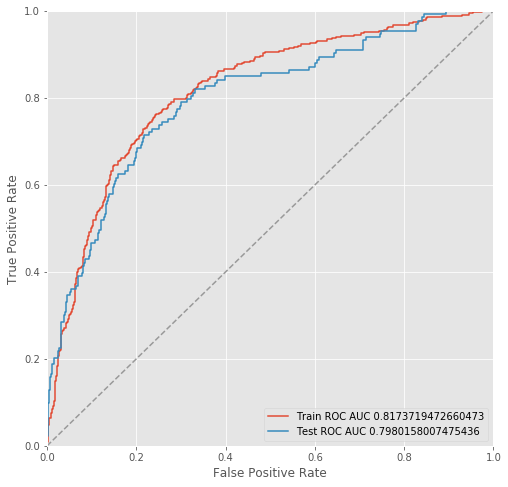

In [46]:
roc_auc_pic(logreg, y_train, y_test, X_train, X_test)

Подбирать пороги можно попробовать на основе precision-recall кривой

In [47]:
# Картинки для PR-кривой, а-меры и прочих ништяков
def plot_precision_recall_curve(y_test, y_pred_proba):
    plt.figure(figsize=(10, 10))
    f_scores = np.linspace(0.4, 0.9, num=6)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.2f}'.format(f_score), xy=(0.9, y[45] + 0.02))
    precision, recall, _ =  precision_recall_curve(y_test, y_pred_proba)

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    plt.xlabel('Recall', size=15)
    plt.ylabel('Precision', size=15)
    plt.title('Precision-Recall curve', size=18)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()

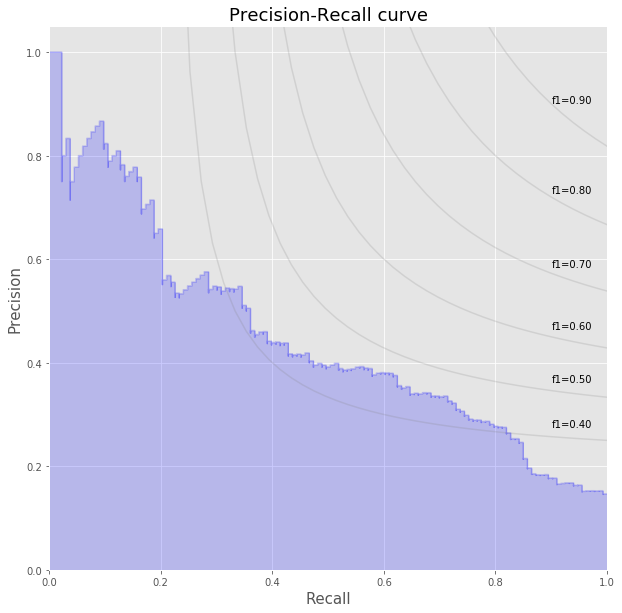

In [48]:
plot_precision_recall_curve(y_test, logreg.predict_proba(X_test)[:, -1])

Окей! Разобрались, давайте попробуем улучшить наши метрики качества и перебрать параметры в рамках наших двух моделей по решётке, да ещё и с кросс-валидацией.

In [64]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# включим опцию, которая отвечает за балансировку классов
logreg_2 = LogisticRegression(class_weight='balanced')

# параметры для перебора (обратный коэфициент регуляризации, С = 1/lambda)
params = {'C' : np.linspace(5, 0, num=100, endpoint=False)}

# делаем перебор, качество смотрим по кросс-валидации с пятью фолдами,
# распаралеливаем на все ядра, используем для сравнений метрику roc_auc
grid = GridSearchCV(logreg_2, params, cv=5, n_jobs=-1, scoring='roc_auc')

In [65]:
%%time
grid.fit(X_train, y_train) # обучаем модели! 

CPU times: user 492 ms, sys: 55.8 ms, total: 548 ms
Wall time: 1.25 s


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([5.  , 4.95, ..., 0.1 , 0.05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [66]:
# лучшее значение метрики и значение параметра
grid.best_params_, grid.best_score_

({'C': 0.2999999999999998}, 0.8226114454229627)

Перебор гиперпараметра помог немножеско поднять качество модели. Попробуем другую модель, случайные лес.

In [67]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)

# сразу же попробуем поперебирать глубину деревьев и число случайных переменных,
# используемых деревом для обучения 
forest_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, scoring='roc_auc')

In [68]:
%%time
forest_grid.fit(X_train, y_train)
forest_grid.best_params_, forest_grid.best_score_ 

CPU times: user 2.37 s, sys: 266 ms, total: 2.64 s
Wall time: 1min 54s


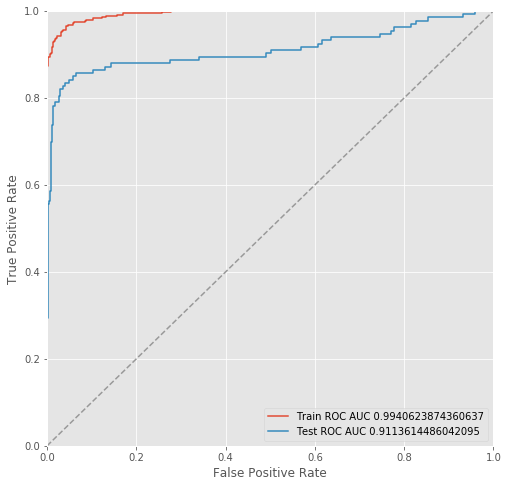

In [69]:
roc_auc_pic(forest_grid, y_train, y_test, X_train, X_test)

ROC-AUC получился няшным. Посмотрим на остальные метрики и подумаем о пороге.

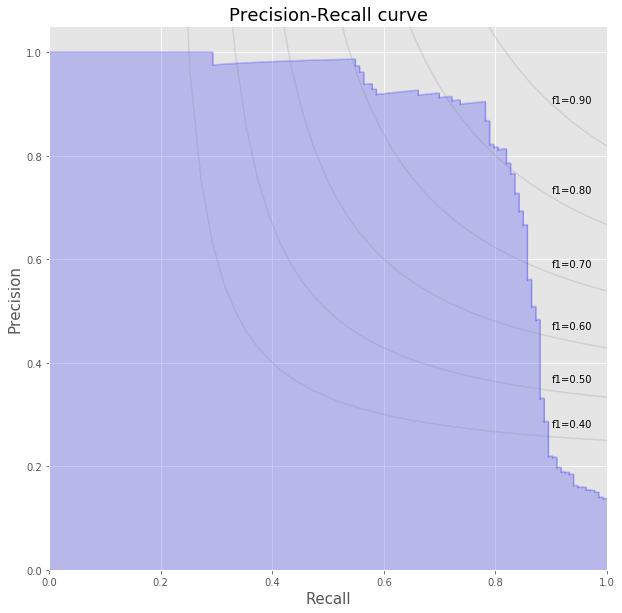

In [71]:
plot_precision_recall_curve(y_test, forest_grid.predict_proba(X_test)[:, -1])

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       867
          1       0.90      0.76      0.82       133

avg / total       0.96      0.96      0.96      1000



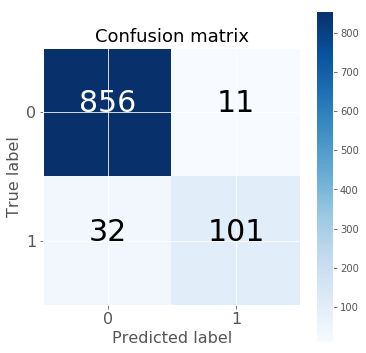

In [84]:
cutoff = 0.4 # выбрали погог

# говорим, что все клиенты с вероятностью оттока больше 0.5 уйдут
y_hat = forest_grid.predict_proba(X_test)[:, -1] > cutoff

# строим матрицу ошибок
cm = confusion_matrix(y_test, y_hat)

# рисуем матрицу ошибок
plot_confusion_matrix(cm, classes=['0', '1'])

# выводим на экран отчёт, в которым посчитаются метрики по всем классам
report = classification_report(y_test, y_hat)
print(report)